In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [31]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
train_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [32]:
train_data.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [33]:
train_data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


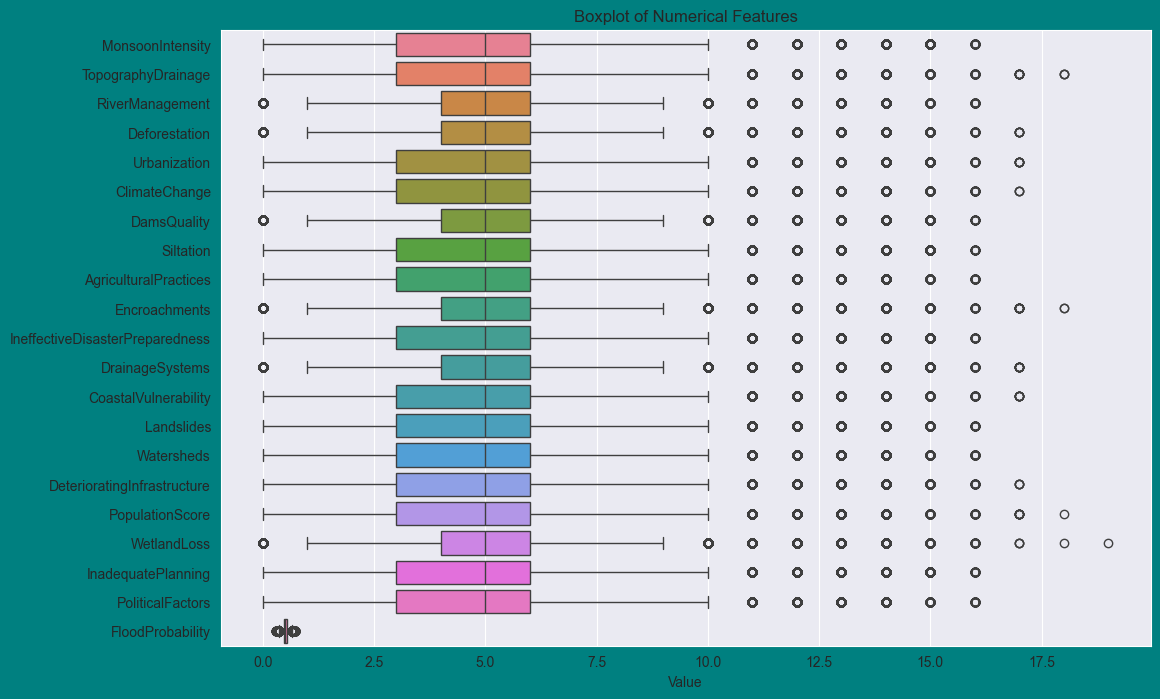

In [34]:
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns.drop('id')
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data[numeric_features], orient="h")
plt.title('Boxplot of Numerical Features')
plt.xlabel('Value')
plt.gcf().set_facecolor('#008080')
plt.show()

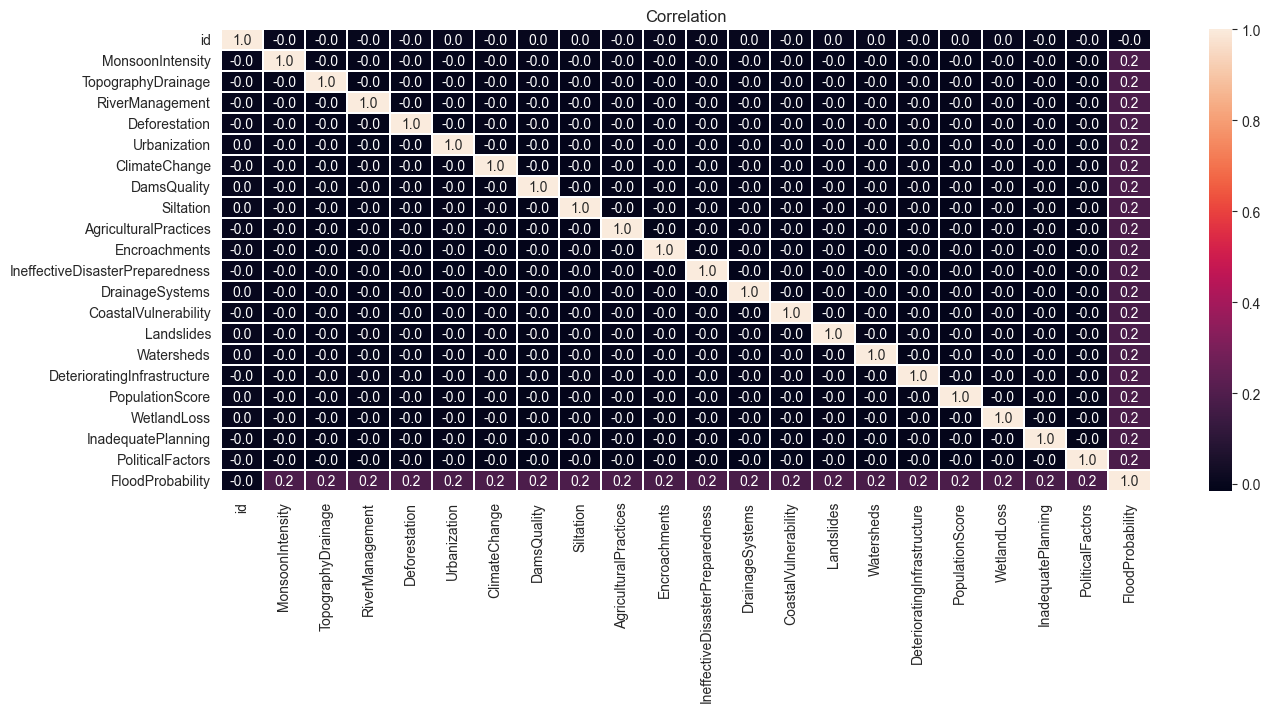

In [35]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.2, fmt=".1f")
plt.title('Correlation')
plt.show()

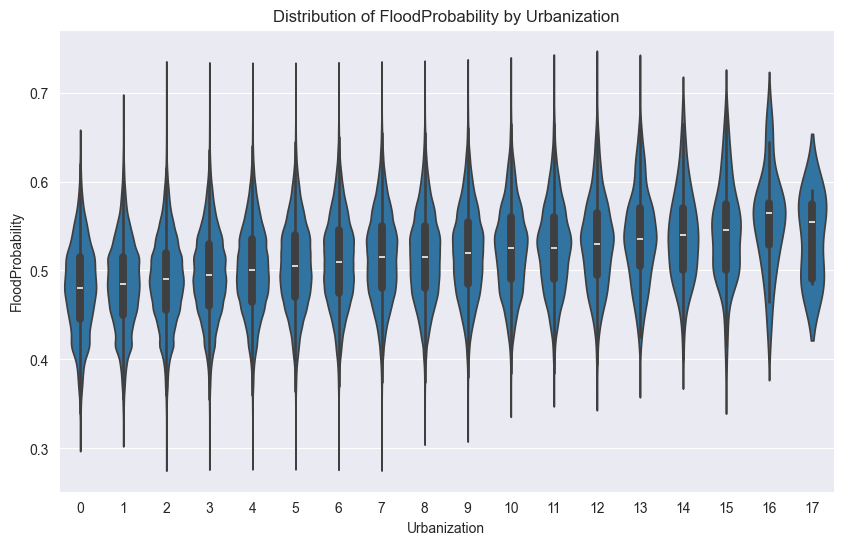

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Urbanization", y="FloodProbability", data=train_data)
plt.title('Distribution of FloodProbability by Urbanization')
plt.show()

In [37]:
train_data = train_data.drop("id", axis=1)
test_data = test_data.drop("id", axis=1)

In [38]:
y = train_data["FloodProbability"]
train_data = train_data.drop("FloodProbability", axis=1)
train_data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


In [39]:
import numpy as np
import pandas as pd

def cleaning(data):
    features = data.columns.tolist()
    data["mean_features"] = 0.1 * data[features].mean(axis=1)
    data["std_features"] = data[features].std(axis=1)
    data["max_features"] = data[features].max(axis=1)
    data["min_features"] = data[features].min(axis=1)
    data["range_features"] = data["max_features"] - data["min_features"]
    data["variance_features"] = data[features].var(axis=1)
    data["skewness_features"] = data[features].skew(axis=1)
    data["sum_features"] = data[features].sum(axis=1)

    mean_abs_dev = (data[features] - data[features].mean(axis=1).values.reshape(-1, 1)).abs().mean(axis=1)
    median_abs_dev = (data[features] - data[features].median(axis=1).values.reshape(-1, 1)).abs().mean(axis=1)
    range_abs_diff = (data[features] - data[features].median(axis=1).values.reshape(-1, 1)).abs().max(axis=1) - \
                     (data[features] - data[features].median(axis=1).values.reshape(-1, 1)).abs().min(axis=1)
    
    # Replace zeros with a very small number before applying log
    data_no_zeros = data[features].replace(0, np.finfo(float).eps)
    geometric_mean = np.exp(np.log(data_no_zeros).mean(axis=1))
    
    harmonic_mean = len(features) / (1 / data_no_zeros).sum(axis=1)
    coeff_variation = data['std_features'] / data['mean_features']

    quartiles = data[features].quantile([0.25, 0.5, 0.75], axis=1)
    data['first_quartile'] = quartiles.loc[0.25]
    data['second_quartile'] = quartiles.loc[0.5]
    data['third_quartile'] = quartiles.loc[0.75]

    kurtosis_features = data[features].kurtosis(axis=1)
    data['kurtosis_features'] = kurtosis_features
    data['mean_absolute_deviation'] = mean_abs_dev
    data['median_absolute_deviation'] = median_abs_dev
    data['range_abs_diff'] = range_abs_diff
    data['geometric_mean'] = geometric_mean
    data['harmonic_mean'] = harmonic_mean
    data['coeff_variation'] = coeff_variation

    data['zscore'] = data[features].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1)

    # Handle zeros in entropy calculation by replacing them with a very small number
    data_entropy = data_no_zeros.apply(lambda x: -1*(x * np.log(x)).sum(), axis=1)
    data['entropy'] = data_entropy

    data = data.drop(features, axis=1)
    return data


In [40]:
train_data = cleaning(train_data)
test_data = cleaning(test_data)

In [41]:
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [42]:
xgb_params = {'n_estimators': 600,
              'max_depth': 4,
              'learning_rate': 0.04,
              }
xgb = XGBRegressor(**xgb_params)
print(cross_val_score(xgb, scaled_train_data, y, cv=5, scoring="neg_root_mean_squared_error"))

[-0.0184601  -0.01849    -0.01850646 -0.01847282 -0.01849792]


In [43]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(scaled_train_data, y)

print(f"Best parameters: {grid_search.best_params_}")
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 500, 1200],\n    \'max_depth\': [3, 6, 9],\n    \'learning_rate\': [0.01, 0.05, 0.1],\n}\n\ngrid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=3, scoring=\'neg_root_mean_squared_error\')\ngrid_search.fit(scaled_train_data, y)\n\nprint(f"Best parameters: {grid_search.best_params_}")\n'

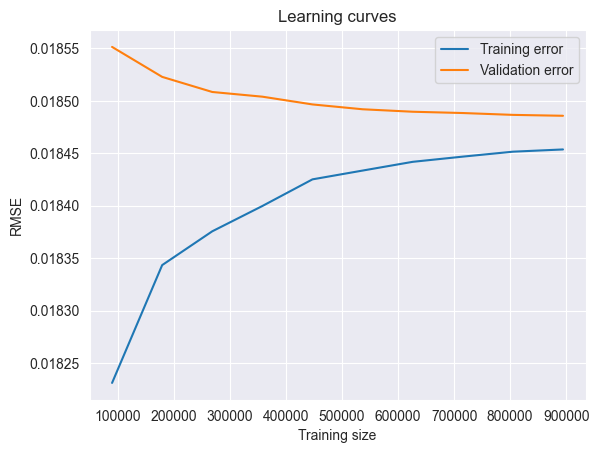

In [44]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(**xgb_params), scaled_train_data, y, cv=5, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning curves')
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_val, y_train, y_val = train_test_split(scaled_train_data, y, test_size=0.2, random_state=42)
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
y_pred_val = xgb.predict(x_val)

print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Training R2:", r2_score(y_train, y_pred_train))
print("Validation R2:", r2_score(y_val, y_pred_val))

Training RMSE: 0.018453278558666426
Validation RMSE: 0.018481681951527135
Training R2: 0.8692685723453797
Validation R2: 0.8685893329641193


In [46]:
sub = pd.read_csv('data/sample_submission.csv')
sub.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


In [47]:
y_pred = xgb.predict(scaled_test_data)
submission = pd.DataFrame({
    'id': sub.id,
    'FloodProbability': y_pred
})
submission.to_csv('Submission.csv', index=False)